In [53]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.io import loadmat
import pandas as pd
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
#load data chunks and convert to numpy
face = np.array(loadmat('./data/data.mat')['face'])
pose = np.array(loadmat('./data/pose.mat')['pose'])
illum = np.array(loadmat('./data/illumination.mat')['illum'])

In [3]:
#split face data into parts
neutral= face[:,:,::3]
smile = face[:,:,1::3]
variation = face[:,:,2::3]

In [5]:
data = np.dstack((neutral,smile))
data = np.array(np.dsplit(data,data.shape[-1])).reshape((400,24,21))

In [6]:
#make labels
labels = []
for i in range(200):
    labels.append(0)
for i in range(200):
    labels.append(1)
labels = np.array(labels)

In [7]:
#transform
data = data/255
data = data.reshape((400,24*21))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42, shuffle='true')

In [41]:
#TASK ONE:Bayes PIPELINE
pca = PCA()
gnb = GaussianNB()

pipe = Pipeline(steps=[('pca', pca), ('bayes', gnb)])

param_grid = {
    'pca__n_components': [i for i in range(1,40)]
}

cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
search = GridSearchCV(pipe, param_grid, scoring='accuracy', n_jobs=-1, cv=5)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.840):
{'pca__n_components': 18}


In [ ]:
'knn__metric' : ['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean','mahalanobis'],'knn_weights' : ['uniform','distance'],
    'knn__p' : [1,2],

In [42]:
ypred = search.predict(X_test)
accuracy_score(y_test,ypred)

0.8863636363636364

In [50]:
#TASK ONE:KNN PIPELINE
pca = PCA()
knn = KNeighborsClassifier()

pipe = Pipeline(steps=[('pca', pca), ('knn', knn)])

param_grid = {
    'pca__n_components': [i for i in range(1,31)],
    'knn__n_neighbors' : [1,2,3,4],  
    'knn__metric' : ['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean','mahalanobis'],
    'knn__weights' : ['uniform','distance'],
    
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
search = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=4, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.832):
{'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'uniform', 'pca__n_components': 17}


In [37]:
search_results = pd.DataFrame(search.cv_results_)

In [51]:
ypred = search.predict(X_test)

In [52]:
accuracy_score(y_test, ypred)

0.7803030303030303

In [66]:
def cm(y_test, ypred, labels_list):
    mat = confusion_matrix(y_test, ypred) 
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                        xticklabels=labels_list,
                        yticklabels=labels_list)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    print('Accuracy: ', accuracy_score(y_test, ypred))
    print('F1: ', f1_score(y_test, ypred))
    print('Precision: ', precision_score(y_test, ypred))
    print('Recall: ', recall_score(y_test, ypred)) 

Accuracy:  0.8484848484848485
F1:  0.84375
Precision:  0.8307692307692308
Recall:  0.8571428571428571


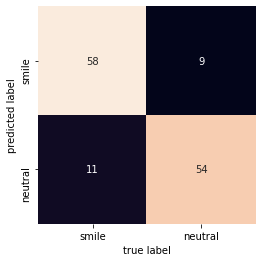

In [68]:
cm(y_test,y_pred,['smile','neutral'])

In [44]:
#one shot PCA/BAYES
pca = PCA(n_components=(18))
pca_data = pca.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(pca_data, labels, test_size=0.33, random_state=42, shuffle='true')

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
# print("Number of mislabeled points out of a total %d points : %d"
#       % (X_test.shape[0], (y_test != y_pred).sum()))

0.8484848484848485


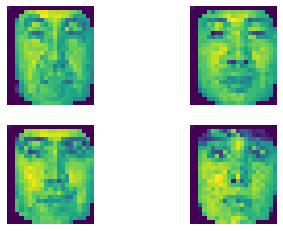

In [632]:
# plt.figure((20,20))
for i in range(4):
    # define subplot
    plt.subplot(2, 2, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow(X[i].reshape((24,21)))

In [843]:
pca_frame = pd.DataFrame({'comp1':pca_data[:,0],'comp2':pca_data[:,1],'class':labels})

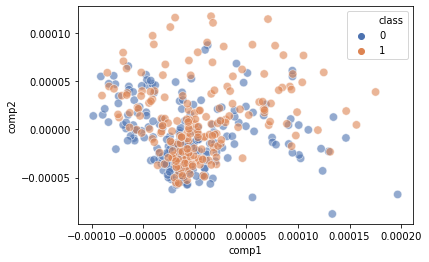

In [844]:
sns.scatterplot(data = pca_frame, x=pca_frame['comp1'],y=pca_frame['comp2'], hue=pca_frame['class'], palette='deep',alpha=0.6, s=70)